In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns # Library visualisasi statistik (Install: pip install seaborn)
import os

# --- KONFIGURASI ---
FOLDER_DATA = "open_meteo_data"
NAMA_FILE = "data_open_meteo.csv" # Pastikan nama ini sama dengan yang didownload
PATH_FILE = os.path.join(FOLDER_DATA, NAMA_FILE)

In [14]:
# =========================================================
# 1. LOAD DATA (MEMUAT DATA)
# =========================================================
def load_data(filepath):
    if not os.path.exists(filepath):
        print(f"❌ File tidak ditemukan: {filepath}")
        return None
    
    # Baca CSV, jadikan kolom 'date' sebagai Index Waktu
    df = pd.read_csv(filepath, index_col='date', parse_dates=True)
    print(f"✅ Data berhasil dimuat! Total: {len(df)} baris.")
    return df

In [15]:
# =========================================================
# 2. STATISTIK DASAR (DESCRIPTIVE)
# =========================================================
def show_basic_stats(df):
    print("\n--- 📊 STATISTIK DASAR ---")
    stats = df.describe().T # Transpose biar enak dibaca
    print(stats[['mean', 'min', 'max', 'std']])
    
    # Total Hujan (Akumulasi)
    total_hujan = df['rain_mm'].sum()
    print(f"\n🌧️ Total Curah Hujan Periode Ini: {total_hujan:.2f} mm")

✅ Data berhasil dimuat! Total: 51144 baris.
🔍 Mencari data untuk periode: 2021-10-28...


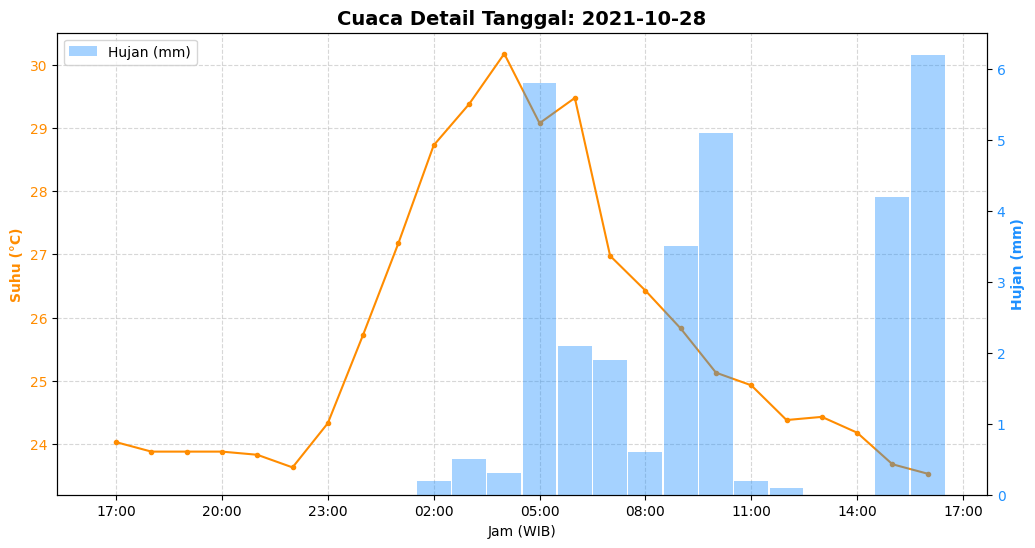

🔍 Mencari data untuk periode: 2021-10...


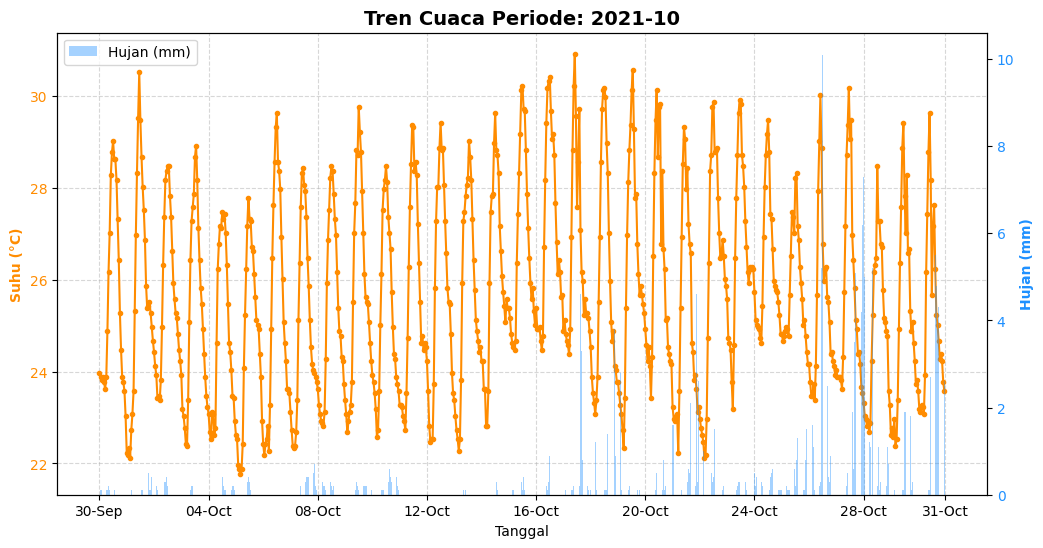

In [18]:
def plot_periode_tertentu(df, target_waktu):
    """
    Memplot data cuaca berdasarkan filter waktu tertentu.
    
    Args:
        df (DataFrame): Data cuaca lengkap.
        target_waktu (str): Bisa berupa:
            - "YYYY-MM-DD" (Contoh: "2025-01-15") -> Plot 24 Jam
            - "YYYY-MM"    (Contoh: "2025-01")    -> Plot 1 Bulan
            - "YYYY"       (Contoh: "2025")       -> Plot 1 Tahun
    """
    print(f"🔍 Mencari data untuk periode: {target_waktu}...")
    
    try:
        # --- 1. SLICING (FILTER DATA) ---
        # Pandas sangat pintar, kita bisa langsung pakai .loc[string]
        subset = df.loc[target_waktu]
        
        if subset.empty:
            print("❌ Data kosong! Cek apakah tanggal ada dalam rentang data.")
            return

        # --- 2. SETUP PLOT ---
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # --- 3. PLOT SUHU (GARIS) ---
        ax1.plot(subset.index, subset['temperature'], 
                 color='darkorange', marker='.', linestyle='-', linewidth=1.5, label='Suhu (°C)')
        ax1.set_ylabel('Suhu (°C)', color='darkorange', fontweight='bold')
        ax1.tick_params(axis='y', labelcolor='darkorange')
        ax1.grid(True, linestyle='--', alpha=0.5)
        
        # --- 4. PLOT HUJAN (BATANG) ---
        ax2 = ax1.twinx()
        # Lebar batang disesuaikan (kalau data harian lebar, kalau bulanan tipis)
        width = 0.04 if len(target_waktu) > 7 else 0.02 
        
        ax2.bar(subset.index, subset['rain_mm'], 
                color='dodgerblue', alpha=0.4, width=width, label='Hujan (mm)')
        ax2.set_ylabel('Hujan (mm)', color='dodgerblue', fontweight='bold')
        ax2.tick_params(axis='y', labelcolor='dodgerblue')
        
        # --- 5. FORMAT SUMBU X (WAKTU) OTOMATIS ---
        # Kalau request Harian (panjang string > 7), tampilkan Jam
        if len(target_waktu) > 7: # Format YYYY-MM-DD
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            ax1.set_xlabel('Jam (WIB)')
            judul = f"Cuaca Detail Tanggal: {target_waktu}"
            
        # Kalau request Bulanan/Tahunan, tampilkan Tanggal
        else:
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
            ax1.set_xlabel('Tanggal')
            judul = f"Tren Cuaca Periode: {target_waktu}"

        plt.title(judul, fontweight='bold', fontsize=14)
        plt.legend(loc='upper left')
        plt.show()
        
    except KeyError:
        print(f"❌ Format salah atau data tidak ditemukan untuk: {target_waktu}")
    except Exception as e:
        print(f"⚠️ Terjadi error: {e}")

# ==========================================
# CONTOH CARA PAKAI
# ==========================================

# Pastikan df_cuaca sudah di-load sebelumnya
# df_cuaca = load_data("open_meteo_data/data_open_meteo.csv") 

if __name__ == "__main__":
    df_cuaca = load_data(PATH_FILE)
    # Contoh 1: Lihat Detail SATU HARI (Misal: 15 Januari 2025)
    # Ini cocok buat analisis kejadian banjir/badai spesifik
    plot_periode_tertentu(df_cuaca, "2021-10-28")

    # Contoh 2: Lihat Tren SATU BULAN (Misal: Januari 2025)
    # Ini cocok buat lihat pola hujan bulanan
    plot_periode_tertentu(df_cuaca, "2021-10")

    # Contoh 3: Lihat Tren SATU TAHUN (2025)
    # plot_periode_tertentu(df_cuaca, "2025")